In [6]:
from numpy import genfromtxt
import numpy as np
mydata = genfromtxt('/Users/xieewenz/Downloads/CSV/COCAINE_JUANES.csv', delimiter=',')
print(mydata)
print(type(mydata))

[[nan nan nan ... nan nan nan]
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  1.  0.  0.]
 ...
 [nan  0.  1. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  1.]
 [nan  0.  0. ...  0.  1.  0.]]
<class 'numpy.ndarray'>


In [7]:
adjacency = mydata[1:,1:]
print(adjacency)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# def show_graph_with_labels(adjacency_matrix, mylabels):
#     rows, cols = np.where(adjacency_matrix == 1)
#     edges = zip(rows.tolist(), cols.tolist())
#     gr = nx.Graph()
#     gr.add_edges_from(edges)
#     nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
#     plt.show()

# show_graph_with_labels(adjacency, make_label_dict(get_labels('mycsv.csv')))

/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 720x720 with 0 Axes>

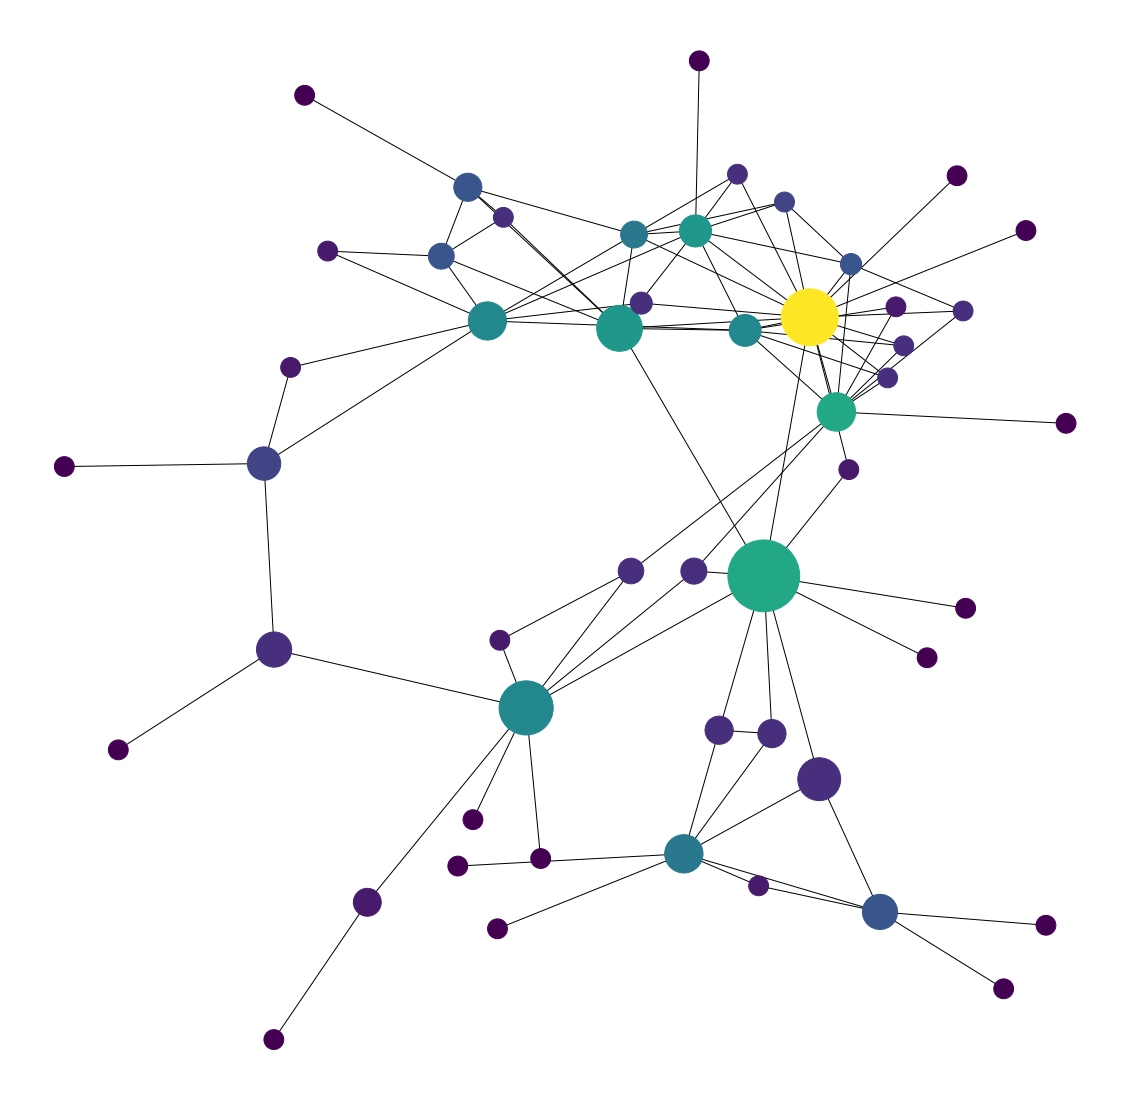

In [16]:
rows, cols = np.where(adjacency== 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
plt.figure(figsize=(10,10))
# nx.draw_networkx(gr)
def use_degree_as_node_size(G):
    G_fb = G
    pos = nx.spring_layout(G_fb)
    betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
    node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
    node_size =  [v * 10000 for v in betCent.values()]
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                     node_color=node_color,
                     node_size=node_size )
    plt.axis('off')
use_degree_as_node_size(gr)